# Trabajo práctico 1 - Domenje Carlos



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

In [17]:
## Importamos las librerias a utilizar. 

import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_openml


In [18]:

PATH_DATASET = "./data/UCI_HAR_Dataset/train"
RANDOM_STATE = 17
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)



In [19]:
# Ejercicio 1 - Implentacion de PCA

def PCA_numpy(X_input,num_componentes):
    # 1. El primer paso es centrar el dataset
    x_central = X_input - np.mean(X_input)
    # 2. Obtener la matriz de covarianza de , revisar en la teoría por qué utilizamos la transpuesta
    x_cov = np.cov(x_central.T)
    # 3. Calcular los autovalores y autovectores de la matriz de covarianza.
    aValues, aVectors = np.linalg.eig(x_cov)
    # 4. Ordernar los autovectores en el sentido de los autovalores decrecientes
    # retorno los indices de AutoValores en forma ascendente.
    # es un vector de indices que nos indica donde debe estar el valor del array que le pasamos.
    iAutoValues = np.argsort(aValues * -1)
    # Ordeno los autoValores
    aValues = aValues[iAutoValues]
    # ordeno los autoVectores
    aVectors = aVectors[:,iAutoValues]
    # 5. Proyectar el dataset centrado sobre los  autovectores más relevantes
    x_proy = x_central @ aVectors[:,:num_componentes]
    # 6. Retorno el valor proyectado teniendo en cuenta la inversion de signo para que me quede igual a la salida PCA de sklearn.
    return x_proy * -1

In [20]:
########################### Test Function ##########################
num_componentes = 1
X = np.array([[0.8, 0.7], [0.1, -0.1]])

print('PCA realizado manualmente: ',  PCA_numpy(X,num_componentes)) 

#Calculo PCA con la libreria de Sklearn
pca = PCA(n_components=num_componentes)
pca.fit(X)
pca_cal_sklearn = pca.transform(X)
print('PCA realizado por sklearn: ',pca_cal_sklearn)

PCA realizado manualmente:  [[ 0.52445188]
 [-0.5385627 ]]
PCA realizado por sklearn:  [[ 0.53150729]
 [-0.53150729]]


## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

In [31]:

# Funcion Kmeans utilizando Numpy.
# Ingreso el vector de entrada y la cantidad de cluster a agrupar
# 1. El usuario selecciona la cantidad de clusters a crear (n_cluster)
def Kmeans_Numpy(X_input,n_clusters):
    #Numero de iteraciones que se van a realizar para calcular las distancias.
    nIter = 100
    # Genero un vector del tamaño de mi entrada con los indices de cada elemento.
    i_cent = [i for i in range(len(X_input))]   
# 2. Se seleccionan n_cluster elementos aleatorios de X_input como posiciones iniciales de los centroides C
    # Sin reemplazar valores (replace - False) y p = None, para que no utilice probabilid asociada.
    centroids = X_input[np.random.choice(i_cent , size=n_clusters, replace=False, p=None)]
    
    # Me aseguro de tener solamente los valores segun mi numero de cluster,
    # asi que recorro de 0 al primer valor None y se lo asigno a la misma lista.
    centroids = centroids[:None]
    
    # Realizo el bucle para la cantidad de iteraciones que previamente definí.
    for i in range(nIter):
# 3. Calculo la distancia entre cada punto de la entrada con cada centroide teniendo en cuenta la Norma del vector.

        distCent = np.linalg.norm(X_input-centroids[:,np.newaxis,:],axis=2)
        # retorna los indices del vector calculado anteriormente

# 4. Para cada punto de X-input se selecciona el centroide mas cercano de C.
        indexCluster = np.argmin(distCent,axis=0)
        # Para cada uno de los centroides calculo la media
        for i in range(len(centroids)):
# 5. Se recalculan los centroides C a partir de usar las filas de X-input que pertenecen a cada centroide.
            centroids[i] = np.mean(X_input[indexCluster==i],axis=0)
# 6. Volvemos a iterar nIter veces.
    
    
    return (indexCluster)

2 - Clusters
Cluster al que pertenece cada fila de la entrada:
  [0 0 0 ... 1 1 1]


/Users/carlosdomenje/Library/Python/3.8/lib/python/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'Implementación de KMEANS - 2 Clusters')

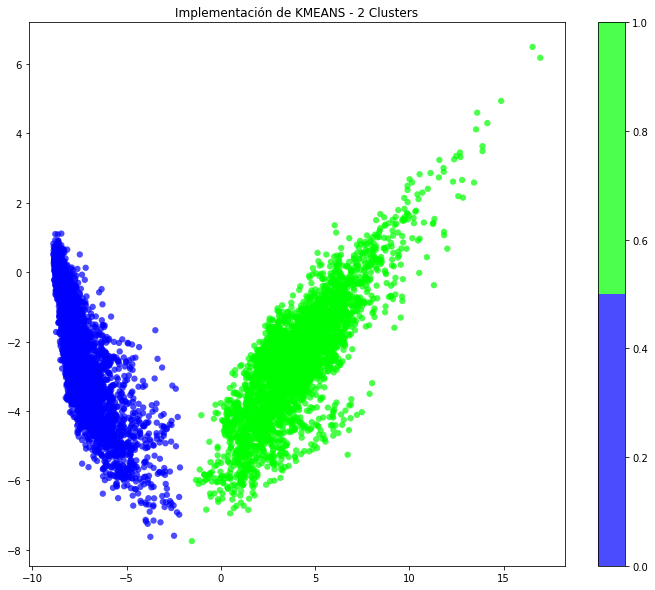

In [33]:
# Calculamos para dos clusters
print('2 - Clusters')
n_clusters = 2
X_PCA_2 = PCA_numpy(X_train,n_clusters)
clusters = Kmeans_Numpy(X_PCA_2,n_clusters)

print("Cluster al que pertenece cada fila de la entrada:\n ",clusters)

# Graficamos los primeros dos componentes para 2 clusters
plt.figure(figsize=(12,10))
plt.scatter(X_PCA_2[:, 0], X_PCA_2[:, 1], c=clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('brg', n_clusters))
plt.colorbar()
plt.title('Implementación de KMEANS - 2 Clusters')


6 - Clusters
Cluster al que pertenece cada fila de la entrada:
  [2 2 2 ... 4 4 4]


Text(0.5, 1.0, 'Implementación de KMEANS - 6 Clusters')

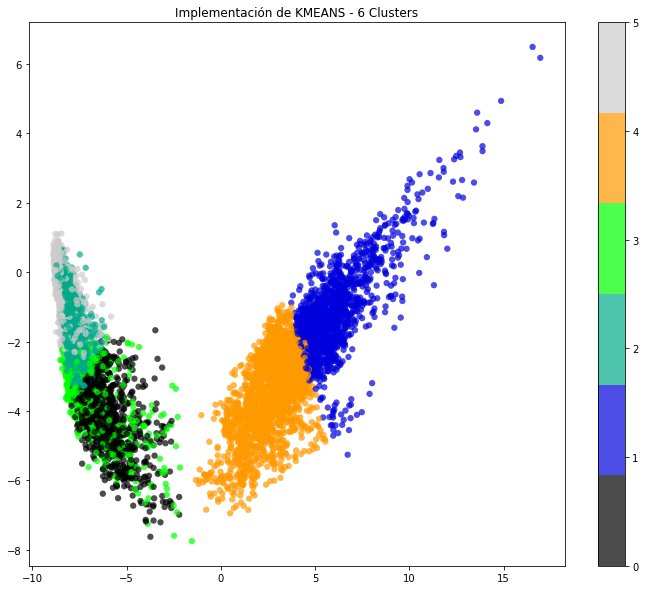

In [34]:
print('6 - Clusters')
# Calculamos para seis clusters
n_clusters = 6
X_PCA_6 = PCA_numpy(X_train,n_clusters)
clusters = Kmeans_Numpy(X_PCA_6,n_clusters)

print("Cluster al que pertenece cada fila de la entrada:\n ",clusters)

# Graficamos los primeros dos componentes para 2 clusters
plt.figure(figsize=(12,10))
plt.scatter(X_PCA_6[:, 0], X_PCA_6[:, 1], c=clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', n_clusters))
plt.colorbar()
plt.title('Implementación de KMEANS - 6 Clusters')

## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

/Users/carlosdomenje/Library/Python/3.8/lib/python/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/carlosdomenje/Library/Python/3.8/lib/python/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'PCA + KMEAN - Con SKlearn')

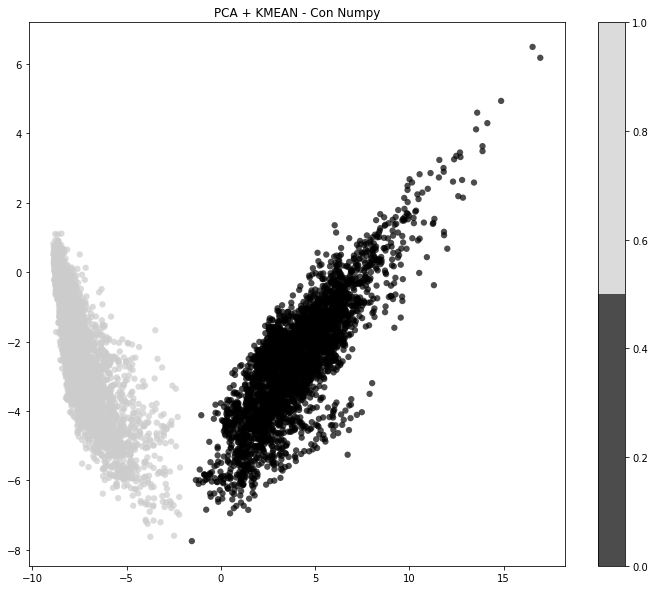

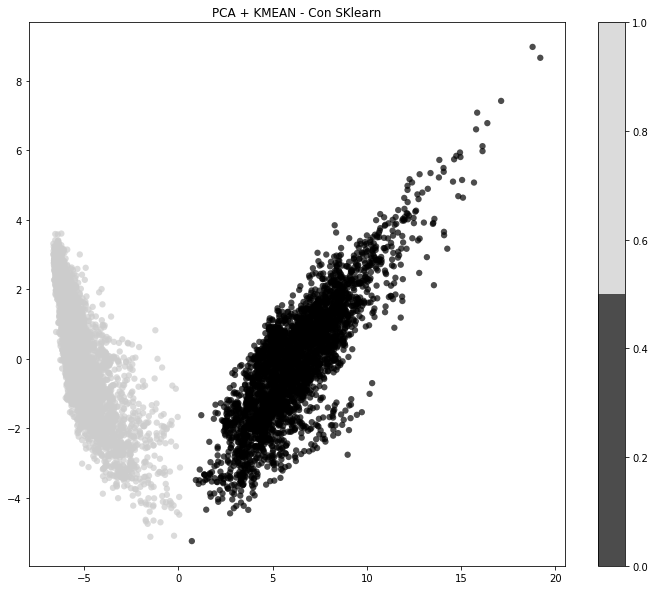

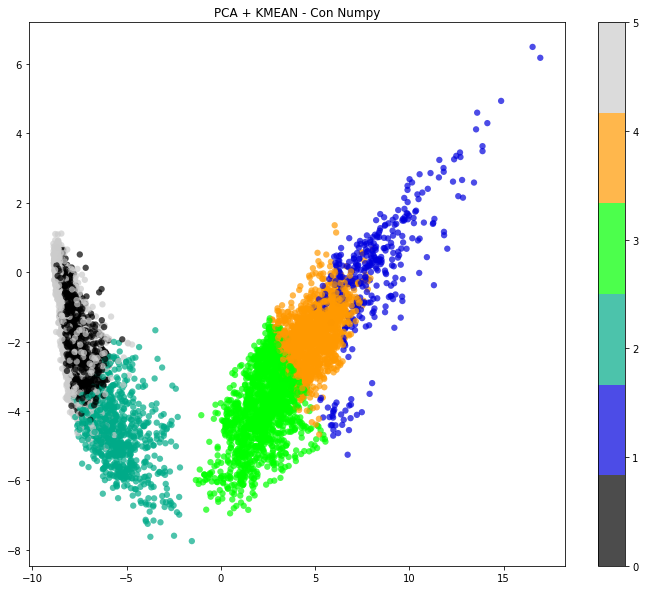

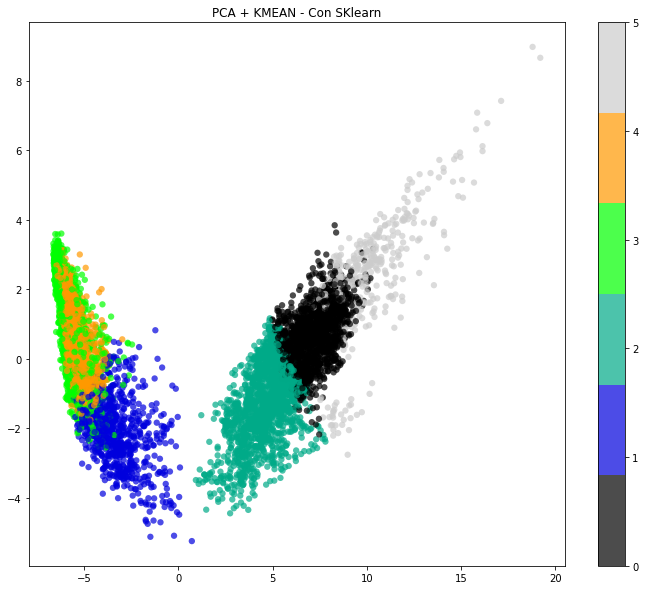

In [42]:
# Para realizar la comparacion con lo visto en clases, se propone realizar las funciones implementadas anteoriormente mediante la llamada a sus funciones 
# y por otro lado, tomar las funciones PCA y Kmeans de sklearn y poder comparar los resultados obtenidos en ambas funciones.

# 1. Testing para PCA y KMeans realizados con Numpy
#####################################################
# Tomamos para el test 2 componentes.
num_componentes = 2
# El dataset es el X_train que se viene utilizando en ejericios anteriores
X = X_train
#Calculamos PCA 
PCA_numpy_test = PCA_numpy(X,num_componentes)
#Calculamos Kmeans
clusters = Kmeans_Numpy(PCA_numpy_test,num_componentes)

# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(PCA_numpy_test[:, 0], PCA_numpy_test[:, 1], c=clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', num_componentes))
plt.colorbar()
plt.title('PCA + KMEAN - Con Numpy')


# 1. Testing para PCA y KMeans realizados con SKlearn
#####################################################
pca = PCA(n_components=num_componentes)
pca.fit(X)
pca_cal_sklearn = pca.transform(X)

kmeans = KMeans(n_clusters=num_componentes, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(pca_cal_sklearn)
cluster_labels = kmeans.labels_

plt.figure(figsize=(12,10))
plt.scatter(pca_cal_sklearn[:, 0], pca_cal_sklearn[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', num_componentes))
plt.colorbar()
plt.title('PCA + KMEAN - Con SKlearn')
################################################################
# 1. Conclusion: Podemos ver que para 2 componentes 
# el comportamiento es similar entre las dos implementaciones.
################################################################

# ------------------------------------------------------------- **** ---------------------------------------------------------------------

# 2. Testing para PCA y KMeans realizados con Numpy
#####################################################
# Tomamos para el test 6 componentes.
num_componentes = 6
# El dataset es el X_train que se viene utilizando en ejericios anteriores
X = X_train
#Calculamos PCA 
PCA_numpy_test = PCA_numpy(X,num_componentes)
#Calculamos Kmeans
clusters = Kmeans_Numpy(PCA_numpy_test,num_componentes)

# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(PCA_numpy_test[:, 0], PCA_numpy_test[:, 1], c=clusters, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', num_componentes))
plt.colorbar()
plt.title('PCA + KMEAN - Con Numpy')


# 2. Testing para PCA y KMeans realizados con SKlearn
#####################################################
pca = PCA(n_components=num_componentes)
pca.fit(X)
pca_cal_sklearn = pca.transform(X)

kmeans = KMeans(n_clusters=num_componentes, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(pca_cal_sklearn)
cluster_labels = kmeans.labels_

plt.figure(figsize=(12,10))
plt.scatter(pca_cal_sklearn[:, 0], pca_cal_sklearn[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', num_componentes))
plt.colorbar()
plt.title('PCA + KMEAN - Con SKlearn')
################################################################
# 2. Conclusion: Podemos ver que para 6 componentes 
# el comportamiento tambien se ajusta a los valores obtenidos
# por las librerias de sklearn vs las librerias implementadas.
################################################################

## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [8]:
# Cargamos los datos de training
#X, y = fetch_openml("mnist", version=1, return_X_y=True, as_frame=False)



OpenMLError: Dataset mnist with version 1 not found.

In [ ]:
# Estandarizamos
scaler = StandardScaler()

X_escalada = normalize(X)
#X_escalada = scaler.fit_transform(X)

#Calculo PCA con 90% de la varianza
RANDOM_STATE = 17
varianza_requerida = 0.9
pca = PCA(n_components=varianza_requerida, random_state=RANDOM_STATE).fit(X_escalada)
X_pca = pca.transform(X_escalada)

# Veo la Cantidad de componentes necesarios
cant_componentes = X_pca.shape[1]
print("Componentes requeridas de PCA para llegar a 90% varianza: ",cant_componentes)